<div class="jumbotron">
  <h1><i class="fa fa-bar-chart" aria-hidden="true"></i> Limpieza de datos</h1>
  <p></p>
</div>

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import os
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
from mlxtend.preprocessing import standardize
from scipy import stats

# Declaración de variables

In [2]:
organismo ="Heterodera"
dataset = 1
nombre = ("ds" + str(dataset) + "_" + str(organismo))
nombre2 = (str(organismo)+ " dataset " + str(dataset))
r2 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_filtrar")
r3 = ("Datos/resultados/"+ str(organismo) + "/" + str(nombre) + "/transformaciones/sin_atipicos")

nom1 = ("/ds" + str(dataset) + "_AAC_efectores_" + str(organismo) + ".txt")
nom2 = ("/ds" + str(dataset) + "_ACC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom3 = ("/ds" + str(dataset) + "_ACC_mass_efectores_" + str(organismo) + ".txt")
nom4 = ("/ds" + str(dataset) + "_ACC_hidro_efectores_" + str(organismo) + ".txt")
nom5 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_efectores_" + str(organismo) + ".txt")
nom6 = ("/ds" + str(dataset) + "_PseAAC_mass_efectores_" + str(organismo) + ".txt")
nom7 = ("/ds" + str(dataset) + "_PseAAC_hidro_efectores_" + str(organismo) + ".txt")

nom8 = ("/ds" + str(dataset) + "_AAC_no_efectores_" + str(organismo) + ".txt")
nom9 = ("/ds" + str(dataset) + "_ACC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom10 = ("/ds" + str(dataset) + "_ACC_mass_no_efectores_" + str(organismo) + ".txt")
nom11 = ("/ds" + str(dataset) + "_ACC_hidro_no_efectores_" + str(organismo) + ".txt")
nom12 = ("/ds" + str(dataset) + "_PseAAC_hidro_mass_no_efectores_" + str(organismo) + ".txt")
nom13 = ("/ds" + str(dataset) + "_PseAAC_mass_no_efectores_" + str(organismo) + ".txt")
nom14 = ("/ds" + str(dataset) + "_PseAAC_hidro_no_efectores_" + str(organismo) + ".txt")

#Efectores
AAC_efec= pd.read_csv(str(r2) + str(nom1), header=None,prefix='X',sep=',')
ACC_hidro_mass_efec = pd.read_csv(str(r2) + str(nom2), header=None,prefix='X',sep=',')
ACC_mass_efec = pd.read_csv(str(r2) + str(nom3), header=None,prefix='X',sep=',')
ACC_hidro_efec = pd.read_csv(str(r2) + str(nom4), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_efec = pd.read_csv(str(r2) +str(nom5), header=None,prefix='X',sep=',')
PseAAC_mass_efec = pd.read_csv(str(r2) + str(nom6), header=None,prefix='X',sep=',')
PseAAC_hidro_efec = pd.read_csv(str(r2) + str(nom7), header=None,prefix='X',sep=',')

#No efectores
AAC_no_efec= pd.read_csv(str(r2) + str(nom8), header=None,prefix='X',sep=',')
ACC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom9), header=None,prefix='X',sep=',')
ACC_mass_no_efec =pd.read_csv(str(r2) + str(nom10), header=None,prefix='X',sep=',')
ACC_hidro_no_efec =pd.read_csv(str(r2) + str(nom11), header=None,prefix='X',sep=',')
PseAAC_hidro_mass_no_efec =pd.read_csv(str(r2) + str(nom12), header=None,prefix='X',sep=',')
PseAAC_mass_no_efec =pd.read_csv(str(r2) + str(nom13), header=None,prefix='X',sep=',')
PseAAC_hidro_no_efec =pd.read_csv(str(r2) + str(nom14), header=None,prefix='X',sep=',')

# Composición de aminoácidos (AAC)

efectores
Composición de aminoácidos (AAC) efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

        X0      X1     X2     X3     X4      X5     X6      X7     X8      X9  \
0   10.662   2.941  6.250  4.412  2.941   6.985  5.882   5.147  0.735   4.044   
1    8.571  14.286  1.714  0.571  4.571   3.429  2.286   5.143  1.714   4.571   
2   12.069   6.034  4.310  5.172  0.000  14.655  7.759   1.724  0.862   2.586   
3    3.030   2.273  9.091  6.061  3.788   3.788  4.545   3.788  2.273   4.545   
4    3.815   4.632  9.537  5.177  3.270   4.905  3.815  10.899  2.180  12.534   
..     ...     ...    ...    ...    ...     ...    ...     ...    ...     ...   
76  12.230   5.755  5.036  3.597  0.000   3.597  2.158  10.072  2.878   5.036   
77   5.056   5.618  3.933  6.180  2.247   9.551  2.809   5.056  0.562   5.618   
78   6.531   4.082  4.082  3.673  2.449   2.449  2.857   6.939  0.408   8.980   
79   9.172   5.325  4.438  3.846  2.959   7.396  4.142   6.509  1

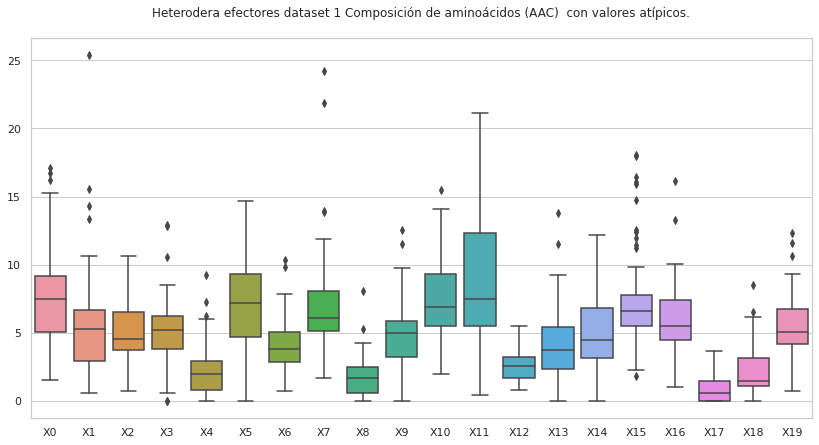

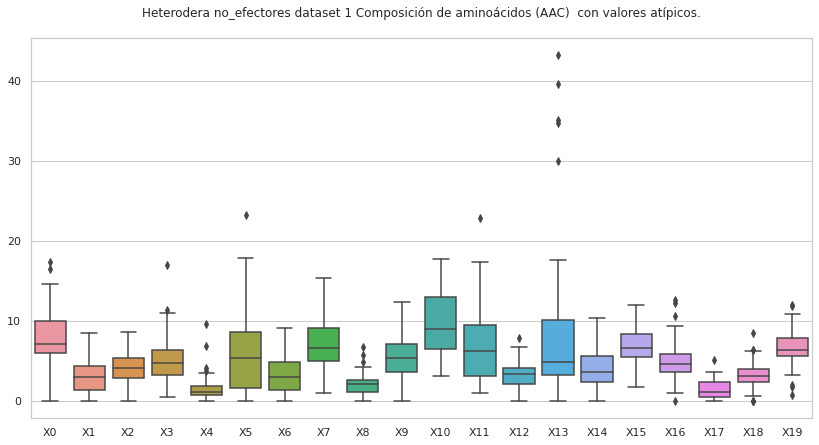

In [3]:
transf = "Composición de aminoácidos (AAC) "
etiq="efectores "
estado = "con valores atípicos.\n"
df=""

for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec    
    
    #del df['X20']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf)+" "+str(estado))

## Composición de aminoácidos (AAC), sin valores atípicos

efectores
Composición de aminoácidos (AAC) efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

        X0      X1     X2     X3     X4      X5     X6      X7     X8     X9  \
0   10.662   2.941  6.250  4.412  2.941   6.985  5.882   5.147  0.735  4.044   
1    8.571  14.286  1.714  0.571  4.571   3.429  2.286   5.143  1.714  4.571   
2   12.069   6.034  4.310  5.172  0.000  14.655  7.759   1.724  0.862  2.586   
3    3.030   2.273  9.091  6.061  3.788   3.788  4.545   3.788  2.273  4.545   
5    4.972   5.525  4.420  6.077  2.210   9.392  2.762   5.525  0.552  5.525   
..     ...     ...    ...    ...    ...     ...    ...     ...    ...    ...   
76  12.230   5.755  5.036  3.597  0.000   3.597  2.158  10.072  2.878  5.036   
77   5.056   5.618  3.933  6.180  2.247   9.551  2.809   5.056  0.562  5.618   
78   6.531   4.082  4.082  3.673  2.449   2.449  2.857   6.939  0.408  8.980   
79   9.172   5.325  4.438  3.846  2.959   7.396  4.142   6.509  1.775  5.32

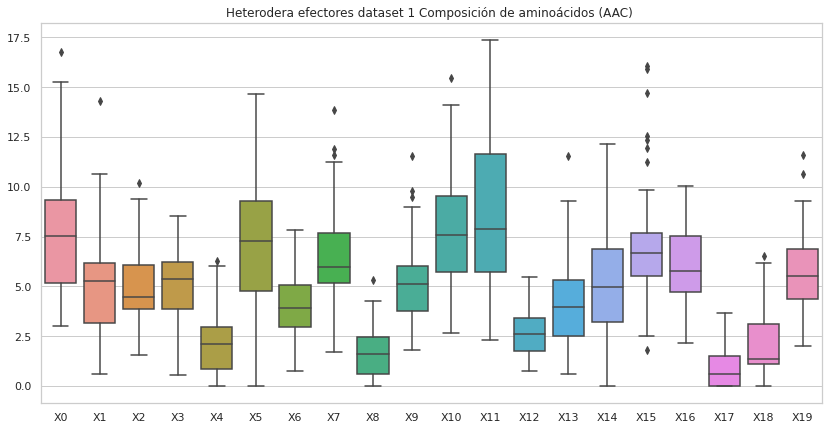

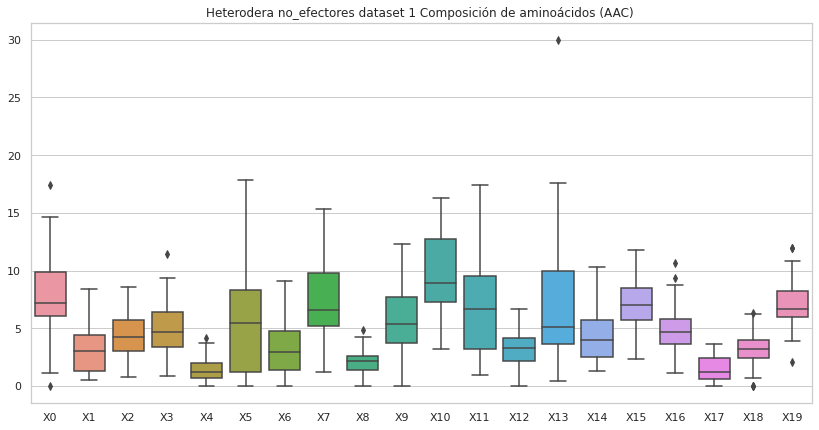

In [4]:
transf = "Composición de aminoácidos (AAC) "
estado = "sin valores atípicos.\n"
transf2="AAC"

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":    
    titulo = (str(transf) + str(etiq) + " " + str(nombre2) + ", " +str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=AAC_efec
        
    if etiq == "no_efectores":
        df=AAC_no_efec   
    
    del df['X20']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])

    df['X20'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq) +" dataset "+ str(dataset)+" "+str(transf))

# Composición de pseudo aminoácidos (PseAAC) hidro_mass

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.058009  0.016002  0.024004  0.038006  0.030005  0.028004  0.004001   
1   0.038327  0.020441  0.002555  0.015331  0.017886  0.022996  0.007665   
2   0.040111  0.000000  0.017190  0.048706  0.014325  0.005730  0.002865   
3   0.014892  0.018614  0.029783  0.018614  0.022337  0.018614  0.011169   
4   0.013831  0.011855  0.018770  0.017782  0.005927  0.039516  0.007903   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.023367  0.000000  0.006873  0.006873  0.005498  0.019244  0.005498   
77  0.007189  0.003195  0.008787  0.013580  0.003195  0.007189  0.000799   
78  0.024521  0.009195  0.013793  0.009195  0.019924  0.026054  0.001533   
79  0.039337  0.012689  0.016496  0.031723  0.020303  0.027916  0.007614   
80  0.029235  0.0

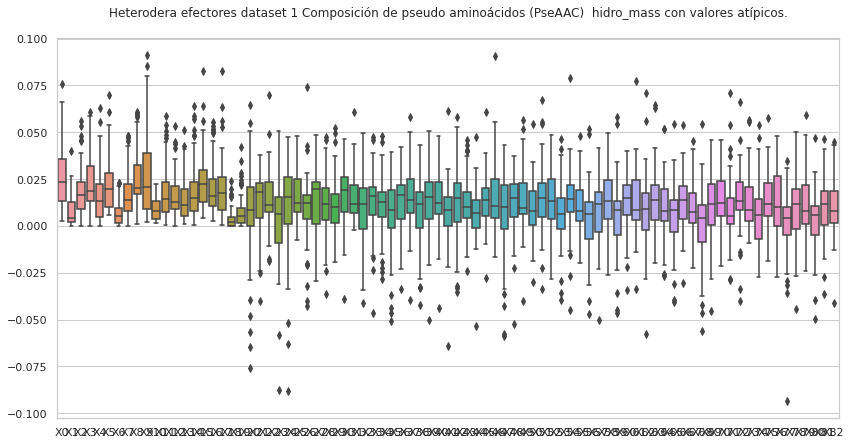

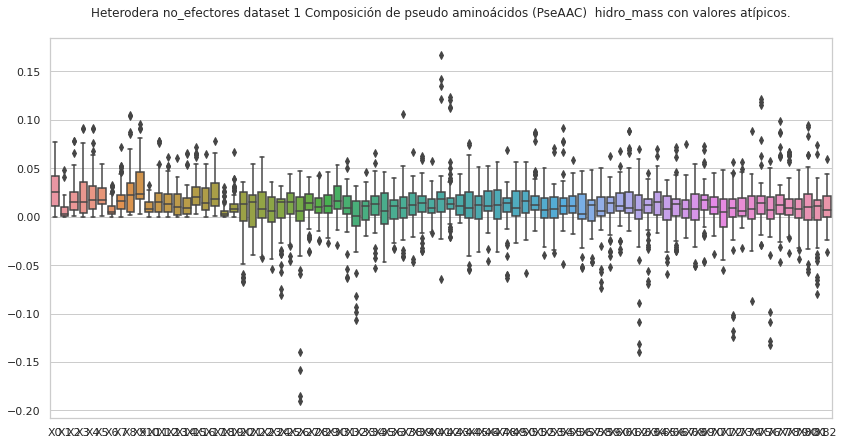

In [5]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    #del df['X83']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro_mass, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro_mass efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.058009  0.016002  0.024004  0.038006  0.030005  0.028004  0.004001   
5   0.007185  0.003193  0.008782  0.013572  0.003193  0.007983  0.000798   
7   0.012829  0.000000  0.024055  0.015235  0.004811  0.020046  0.006415   
8   0.014355  0.004101  0.020507  0.022557  0.017431  0.018456  0.008203   
10  0.039830  0.012848  0.016703  0.032121  0.020557  0.028266  0.007709   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.023367  0.000000  0.006873  0.006873  0.005498  0.019244  0.005498   
77  0.007189  0.003195  0.008787  0.013580  0.003195  0.007189  0.000799   
78  0.024521  0.009195  0.013793  0.009195  0.019924  0.026054  0.001533   
79  0.039337  0.012689  0.016496  0.031723  0.020303  0.027916  0.007614   
80  0.029235  0.0

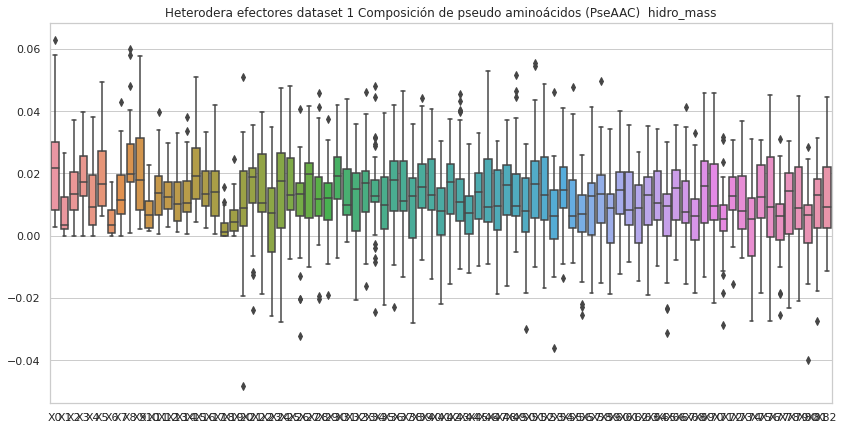

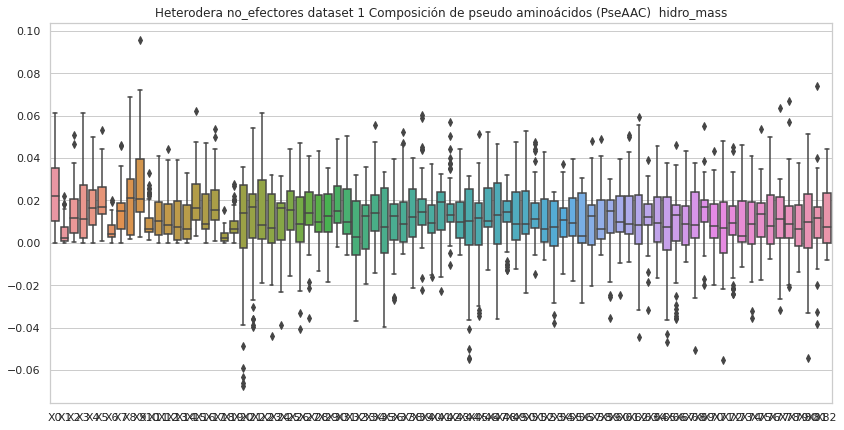

In [6]:
#hidro_mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_mass_no_efec

    del df['X83']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X83'] = etiq    
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) mass

efectores
Composición de pseudo aminoácidos (PseAAC)  mass efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.060335  0.016644  0.024966  0.039530  0.031208  0.029127  0.004161   
1   0.071047  0.037892  0.004736  0.028419  0.033155  0.042628  0.014209   
2   0.099546  0.000000  0.042663  0.120877  0.035552  0.014221  0.007110   
3   0.019767  0.024708  0.039533  0.024708  0.029650  0.024708  0.014825   
4   0.014423  0.012363  0.019574  0.018544  0.006181  0.041209  0.008242   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.029099  0.000000  0.008559  0.008559  0.006847  0.023964  0.006847   
77  0.025844  0.011486  0.031587  0.048817  0.011486  0.025844  0.002872   
78  0.038419  0.014407  0.021611  0.014407  0.031215  0.040820  0.002401   
79  0.051086  0.016479  0.021423  0.041198  0.026367  0.036255  0.009888   
80  0.033304  0.007401 

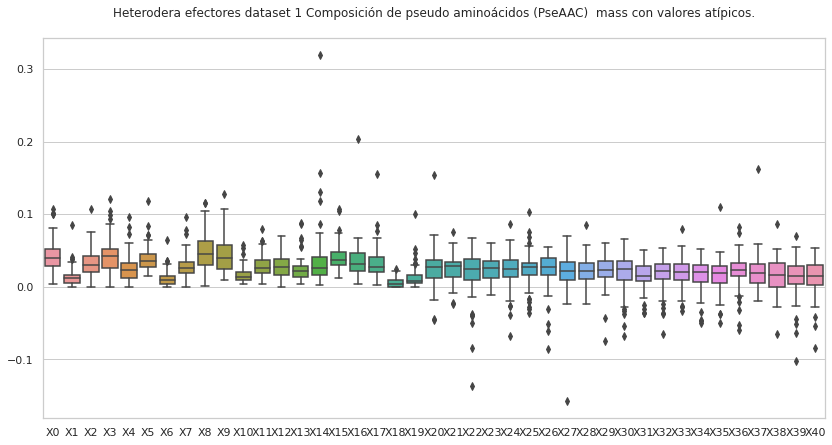

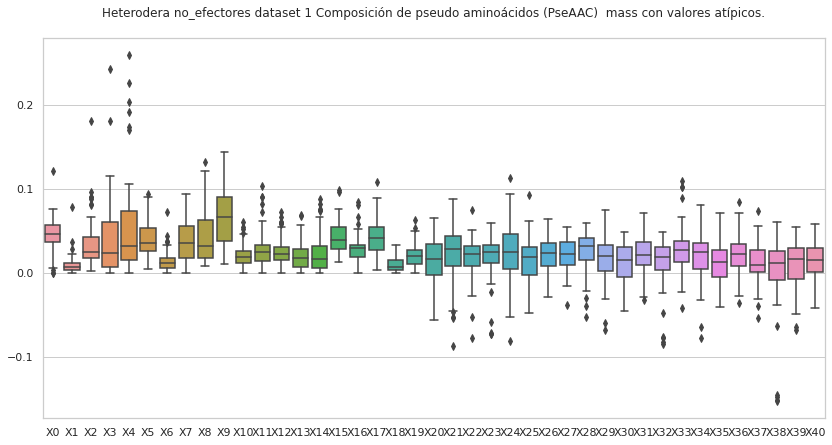

In [7]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    #del df['X41']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) mass, sin valores atípicos

Composición de pseudo aminoácidos (PseAAC)  mass efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.060335  0.016644  0.024966  0.039530  0.031208  0.029127  0.004161   
3   0.019767  0.024708  0.039533  0.024708  0.029650  0.024708  0.014825   
4   0.014423  0.012363  0.019574  0.018544  0.006181  0.041209  0.008242   
5   0.025549  0.011355  0.031227  0.048260  0.011355  0.028388  0.002839   
7   0.024131  0.000000  0.045245  0.028655  0.009049  0.037704  0.012065   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.029099  0.000000  0.008559  0.008559  0.006847  0.023964  0.006847   
77  0.025844  0.011486  0.031587  0.048817  0.011486  0.025844  0.002872   
78  0.038419  0.014407  0.021611  0.014407  0.031215  0.040820  0.002401   
79  0.051086  0.016479  0.021423  0.041198  0.026367  0.036255  0.009888   
80  0.033304  0.007401  0.016652 

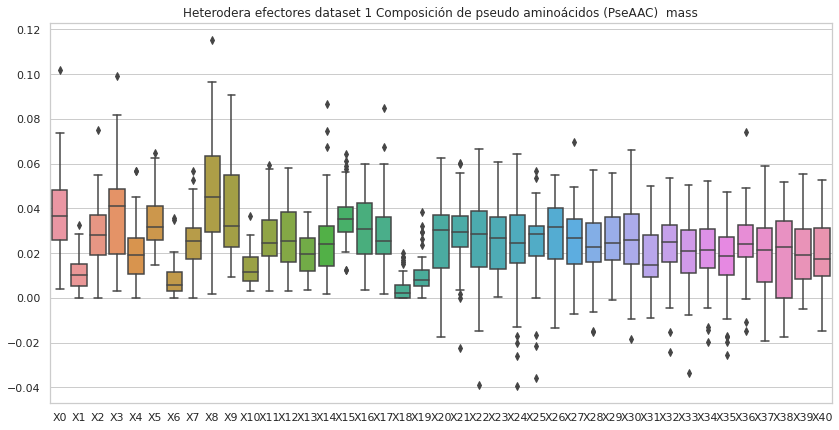

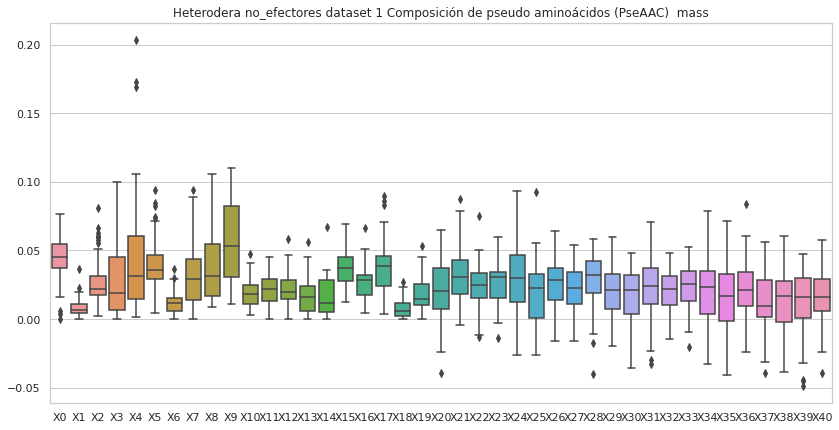

In [8]:
#mass
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=PseAAC_mass_efec

    if etiq == "no_efectores":
        df=PseAAC_mass_no_efec

    del df['X41']
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X41'] = etiq
    df_out = pd.concat([df_out,df])
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Composición de pseudo aminoácidos (PseAAC) hidro

efectores
Composición de pseudo aminoácidos (PseAAC)  hidro efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.099562  0.027465  0.041198  0.065230  0.051498  0.048064  0.006866   
1   0.042225  0.022520  0.002815  0.016890  0.019705  0.025335  0.008445   
2   0.043157  0.000000  0.018496  0.052405  0.015413  0.006165  0.003083   
3   0.020177  0.025221  0.040354  0.025221  0.030265  0.025221  0.015133   
4   0.034266  0.029371  0.046504  0.044057  0.014686  0.097904  0.019581   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.060217  0.000000  0.017711  0.017711  0.014169  0.049590  0.014169   
77  0.008321  0.003698  0.010170  0.015717  0.003698  0.008321  0.000925   
78  0.033262  0.012473  0.018710  0.012473  0.027025  0.035341  0.002079   
79  0.059702  0.019259  0.025036  0.048147  0.030814  0.042369  0.011555   
80  0.058021  0.012893

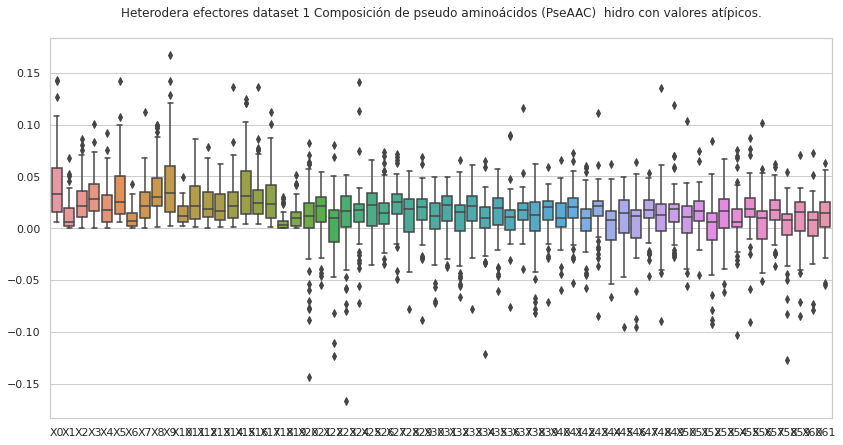

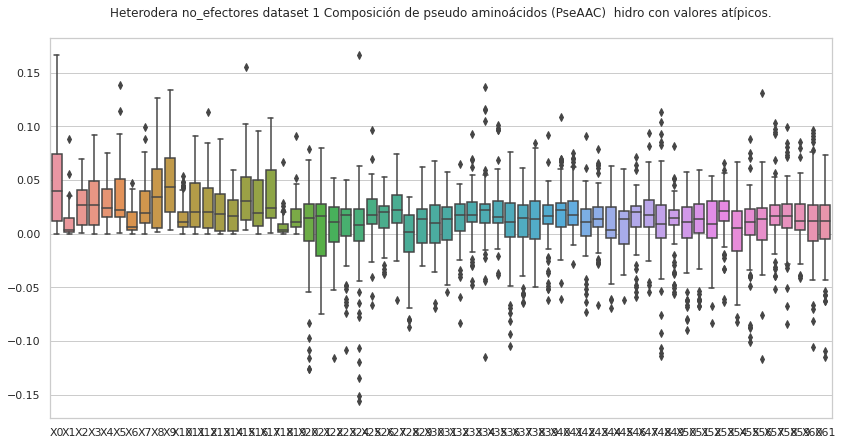

In [9]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    #del df['X62']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Composición de pseudo aminoácidos (PseAAC) hidro, sin valores atípicos

efectores
Composición de pseudo aminoácidos (PseAAC)  efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.099562  0.027465  0.041198  0.065230  0.051498  0.048064  0.006866   
1   0.042225  0.022520  0.002815  0.016890  0.019705  0.025335  0.008445   
2   0.043157  0.000000  0.018496  0.052405  0.015413  0.006165  0.003083   
5   0.008323  0.003699  0.010173  0.015721  0.003699  0.009248  0.000925   
7   0.019558  0.000000  0.036671  0.023225  0.007334  0.030559  0.009779   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.060217  0.000000  0.017711  0.017711  0.014169  0.049590  0.014169   
77  0.008321  0.003698  0.010170  0.015717  0.003698  0.008321  0.000925   
78  0.033262  0.012473  0.018710  0.012473  0.027025  0.035341  0.002079   
79  0.059702  0.019259  0.025036  0.048147  0.030814  0.042369  0.011555   
80  0.058021  0.012893  0.02

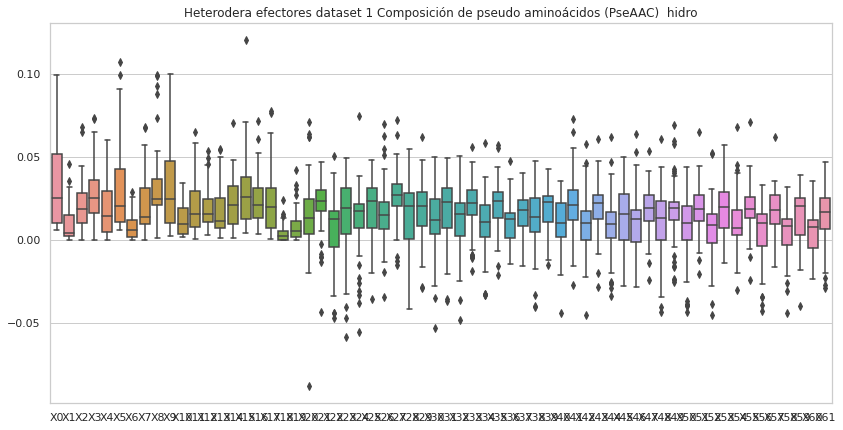

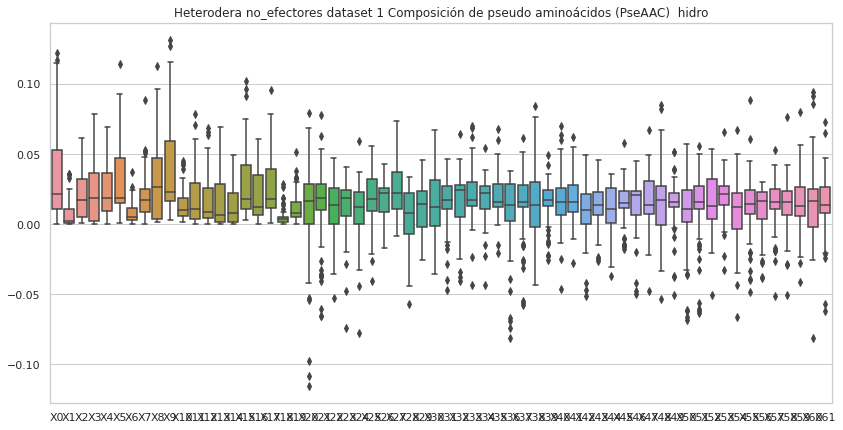

In [10]:
#hidro
transf = "Composición de pseudo aminoácidos (PseAAC) "
transf2 = "PseAAC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()


for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=PseAAC_hidro_efec

    if etiq == "no_efectores":
        df=PseAAC_hidro_no_efec

    del df['X62']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X62'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)
    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro_mass

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.038769  0.031259  0.002415  0.011131 -0.020154  0.030932  0.038987   
1   0.077828  0.012054 -0.121769  0.056352 -0.023107  0.101445  0.000900   
2  -0.137930 -0.007231  0.020661  0.056659 -0.034381 -0.009534  0.011462   
3  -0.006994  0.011514  0.120517 -0.003738 -0.002641  0.036674 -0.073480   
4   0.119770 -0.044673 -0.024220 -0.031648 -0.063063 -0.025467  0.105083   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.154887  0.142653 -0.035713  0.035094 -0.038459 -0.034522 -0.059078   
77  0.052752  0.045389  0.076326  0.037815  0.114526  0.059162  0.095152   
78  0.129281 -0.014146  0.040115  0.079577  0.038408  0.131465 -0.063595   
79  0.064474  0.017109 -0.073589 -0.033216 -0.010125  0.043477  0.105925   
80  0.028575  0.070338 

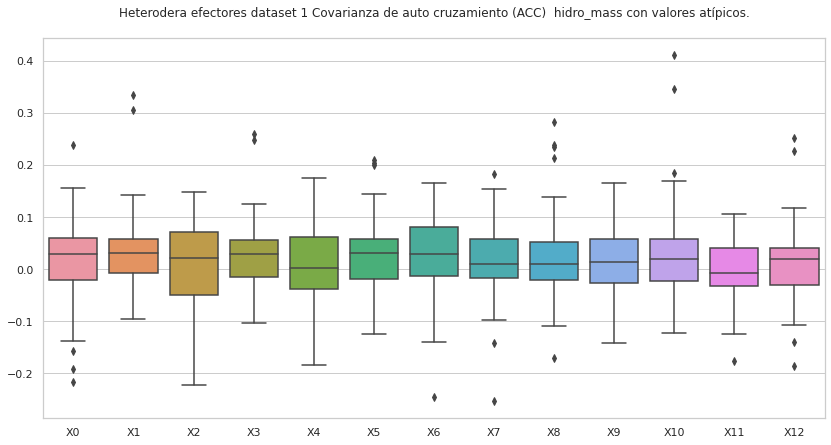

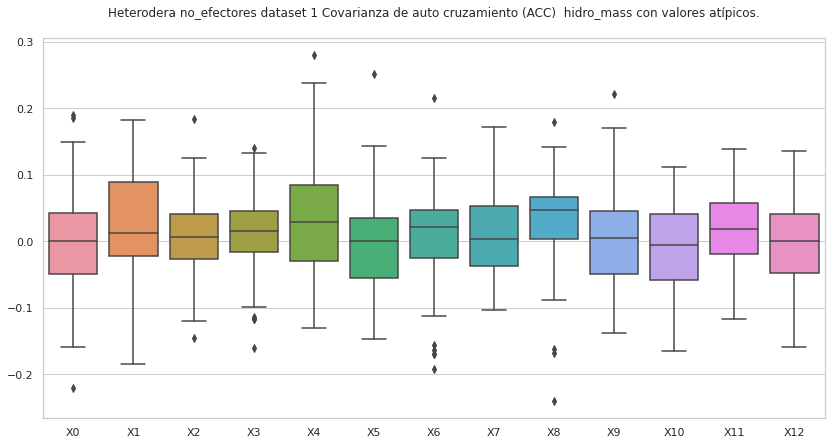

In [11]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro_mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro_mass, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  hidro_mass efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.038769  0.031259  0.002415  0.011131 -0.020154  0.030932  0.038987   
1   0.077828  0.012054 -0.121769  0.056352 -0.023107  0.101445  0.000900   
2  -0.137930 -0.007231  0.020661  0.056659 -0.034381 -0.009534  0.011462   
3  -0.006994  0.011514  0.120517 -0.003738 -0.002641  0.036674 -0.073480   
4   0.119770 -0.044673 -0.024220 -0.031648 -0.063063 -0.025467  0.105083   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.154887  0.142653 -0.035713  0.035094 -0.038459 -0.034522 -0.059078   
77  0.052752  0.045389  0.076326  0.037815  0.114526  0.059162  0.095152   
78  0.129281 -0.014146  0.040115  0.079577  0.038408  0.131465 -0.063595   
79  0.064474  0.017109 -0.073589 -0.033216 -0.010125  0.043477  0.105925   
80  0.028575  0.070338 

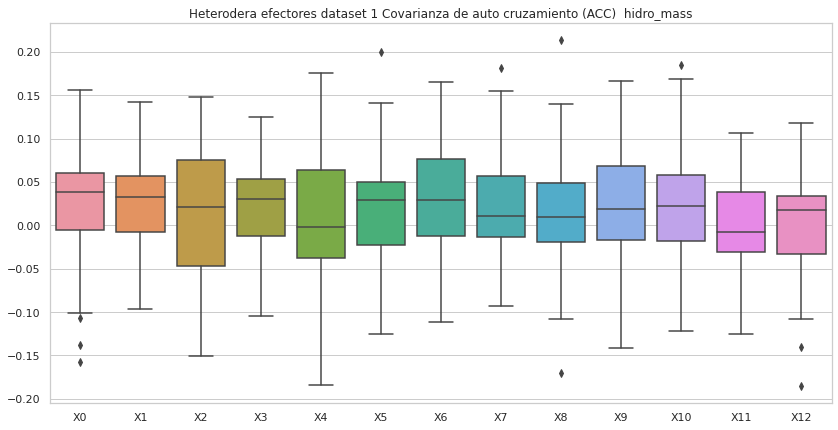

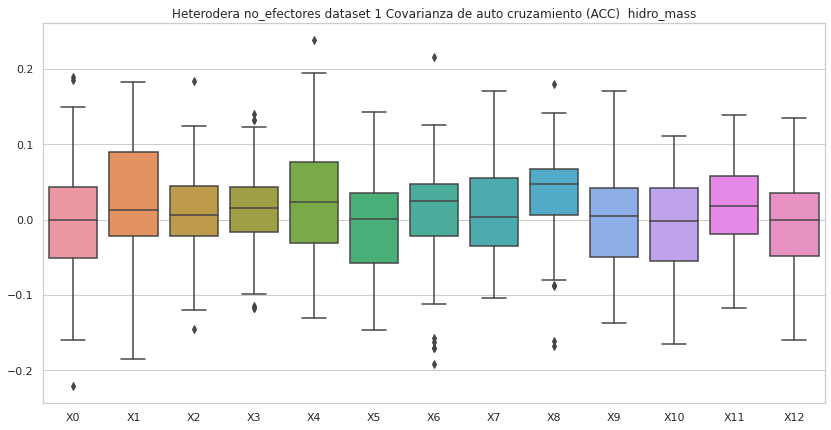

In [12]:
#hidro_mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro_mass"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_mass_efec

    if etiq == "no_efectores":
        df=ACC_hidro_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) mass

efectores
Covarianza de auto cruzamiento (ACC)  mass efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.038769  0.031259  0.002415  0.011131 -0.020154  0.030932  0.038987   
1   0.077828  0.012054 -0.121769  0.056352 -0.023107  0.101445  0.000900   
2  -0.137930 -0.007231  0.020661  0.056659 -0.034381 -0.009534  0.011462   
3  -0.006994  0.011514  0.120517 -0.003738 -0.002641  0.036674 -0.073480   
4   0.119770 -0.044673 -0.024220 -0.031648 -0.063063 -0.025467  0.105083   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.154887  0.142653 -0.035713  0.035094 -0.038459 -0.034522 -0.059078   
77  0.052752  0.045389  0.076326  0.037815  0.114526  0.059162  0.095152   
78  0.129281 -0.014146  0.040115  0.079577  0.038408  0.131465 -0.063595   
79  0.064474  0.017109 -0.073589 -0.033216 -0.010125  0.043477  0.105925   
80  0.028575  0.070338 -0.061

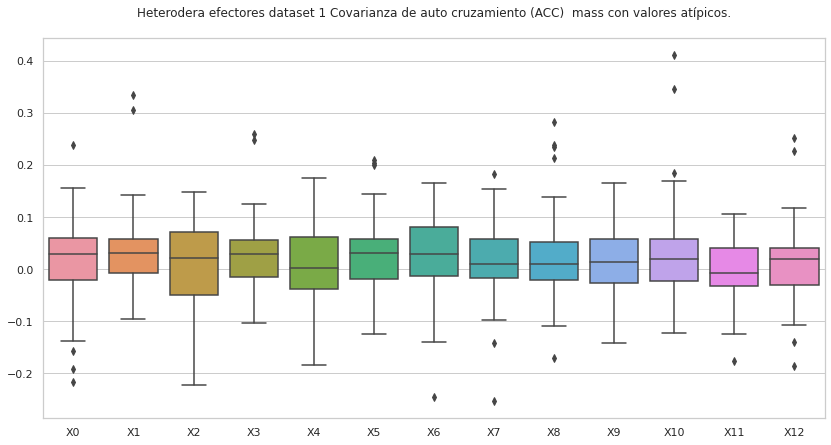

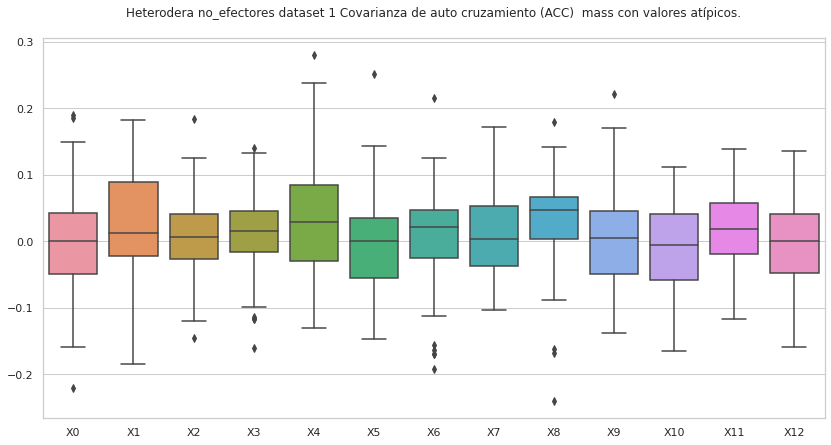

In [13]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "mass"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) mass, sin valores atípicos

Covarianza de auto cruzamiento (ACC)  mass efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0  -0.038769  0.031259  0.002415  0.011131 -0.020154  0.030932  0.038987   
1   0.077828  0.012054 -0.121769  0.056352 -0.023107  0.101445  0.000900   
2  -0.137930 -0.007231  0.020661  0.056659 -0.034381 -0.009534  0.011462   
3  -0.006994  0.011514  0.120517 -0.003738 -0.002641  0.036674 -0.073480   
4   0.119770 -0.044673 -0.024220 -0.031648 -0.063063 -0.025467  0.105083   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.154887  0.142653 -0.035713  0.035094 -0.038459 -0.034522 -0.059078   
77  0.052752  0.045389  0.076326  0.037815  0.114526  0.059162  0.095152   
78  0.129281 -0.014146  0.040115  0.079577  0.038408  0.131465 -0.063595   
79  0.064474  0.017109 -0.073589 -0.033216 -0.010125  0.043477  0.105925   
80  0.028575  0.070338 -0.061186 -0.001

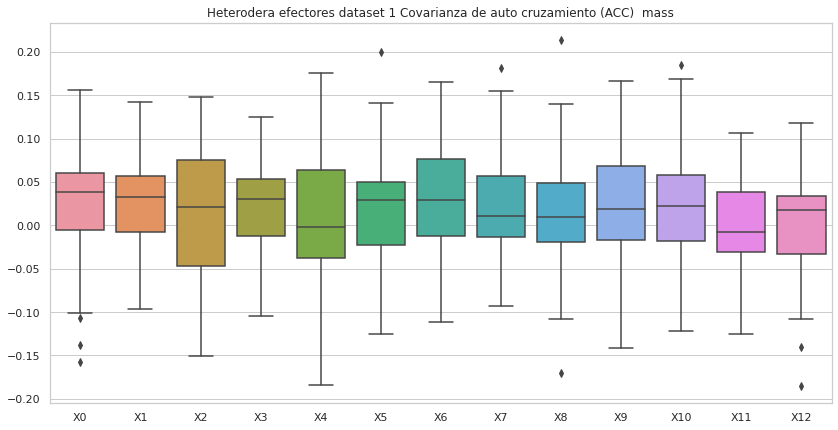

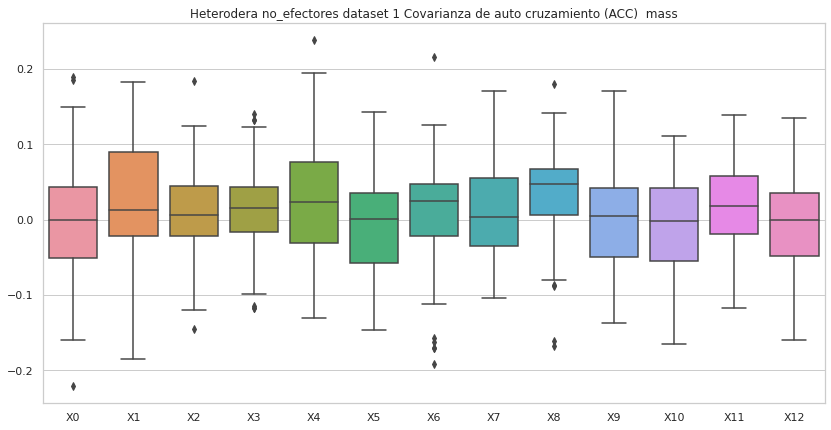

In [14]:
#mass
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "mass"
df=""

#Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df=""
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))

    if etiq == "efectores":
        df=ACC_mass_efec

    if etiq == "no_efectores":
        df=ACC_mass_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    

    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))

# Covarianza de auto cruzamiento (ACC) hidro

efectores
Covarianza de auto cruzamiento (ACC)  hidro efectores Heterodera dataset 1, con valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.055143 -0.134738 -0.071098  0.121843  0.029562  0.014554 -0.055971   
1  -0.066495 -0.072227 -0.084825  0.075908  0.057859 -0.182268  0.016332   
2   0.023471 -0.226590  0.023738  0.138031 -0.129894 -0.195536  0.103991   
3  -0.071158  0.060737  0.193862 -0.021740  0.041220  0.044213 -0.088489   
4  -0.081184  0.085448 -0.071963 -0.004516  0.048894 -0.084502  0.001859   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.075705  0.003740  0.094708  0.178378  0.145760 -0.024424  0.102125   
77  0.071354  0.195788  0.113852  0.084953  0.039603  0.113079  0.055913   
78  0.066221  0.042181  0.033988  0.155107  0.109672  0.001978  0.110386   
79  0.062521 -0.025851  0.075452  0.057947  0.065510  0.109329 -0.058690   
80  0.042315 -0.106566  0.00

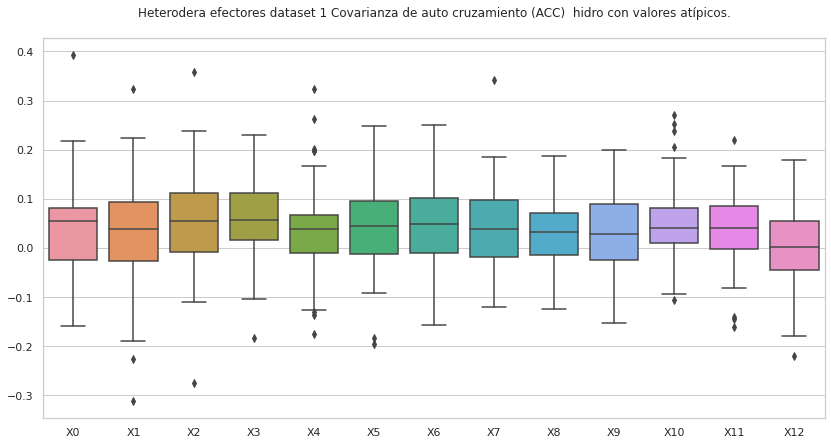

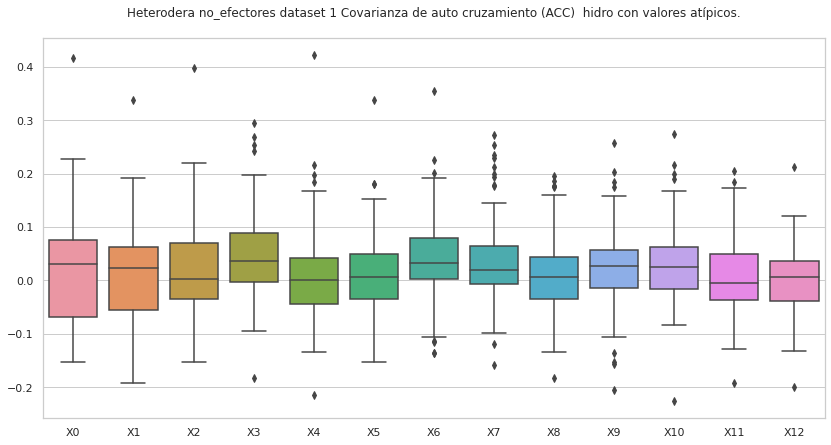

In [15]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "con valores atípicos.\n"
comp = "hidro"
df=""

for etiq in "efectores", "no_efectores":
    titulo = (str(transf)+" "+ str(comp)+" "+ str(etiq) + " "+ str(nombre2) +", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    #del df['X13']
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp)+" "+str(estado))

## Covarianza de auto cruzamiento (ACC) hidro, sin valores atípicos

efectores
Covarianza de auto cruzamiento (ACC)  efectores Heterodera dataset 1, sin valores atípicos.
Valores del documento csv.

          X0        X1        X2        X3        X4        X5        X6  \
0   0.055143 -0.134738 -0.071098  0.121843  0.029562  0.014554 -0.055971   
1  -0.066495 -0.072227 -0.084825  0.075908  0.057859 -0.182268  0.016332   
2   0.023471 -0.226590  0.023738  0.138031 -0.129894 -0.195536  0.103991   
3  -0.071158  0.060737  0.193862 -0.021740  0.041220  0.044213 -0.088489   
4  -0.081184  0.085448 -0.071963 -0.004516  0.048894 -0.084502  0.001859   
..       ...       ...       ...       ...       ...       ...       ...   
76  0.075705  0.003740  0.094708  0.178378  0.145760 -0.024424  0.102125   
77  0.071354  0.195788  0.113852  0.084953  0.039603  0.113079  0.055913   
78  0.066221  0.042181  0.033988  0.155107  0.109672  0.001978  0.110386   
79  0.062521 -0.025851  0.075452  0.057947  0.065510  0.109329 -0.058690   
80  0.042315 -0.106566  0.002724  

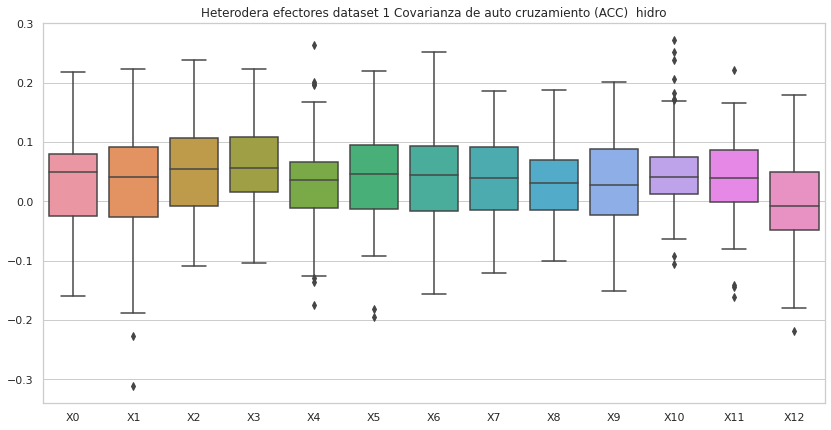

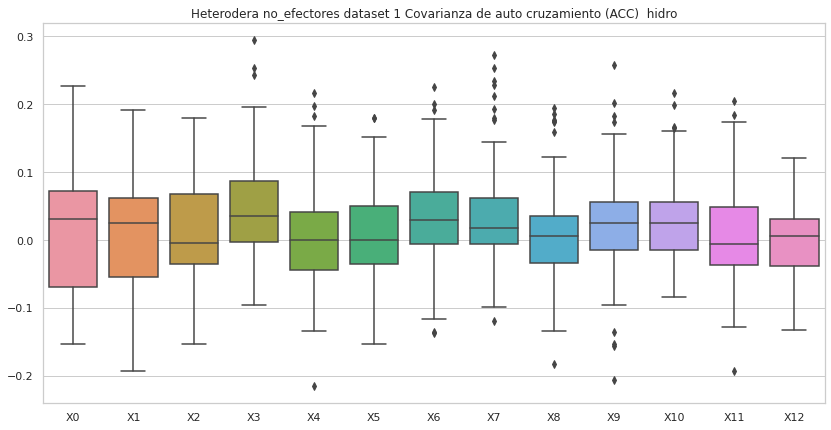

In [16]:
#hidro
transf = "Covarianza de auto cruzamiento (ACC) "
transf2 = "ACC"
estado = "sin valores atípicos.\n"
comp = "hidro"
df=""

out = (str(r3) + '/ds' + str(dataset) + '_' + str(transf2) + '_' + str(comp) + '_' + str(organismo) + '.csv')
os.makedirs(str(r3), exist_ok=True)
df_out = pd.DataFrame()

for etiq in "efectores", "no_efectores":
    titulo = (str(transf) +" "+ str(etiq) + " " + str(nombre2) + ", " + str(estado))
    print (str(etiq))

    if etiq == "efectores":
        df=ACC_hidro_efec

    if etiq == "no_efectores":
        df=ACC_hidro_no_efec

    del df['X13']
    #Se eliminan todas las filas que tengan valores atípicos en al menos una de sus columnas.
    df = (df[(np.abs(stats.zscore(df)) < 3).all(axis=1)])
    df['X13'] = etiq    
    df_out = pd.concat([df_out,df]) 
    
    #Guarda la lista csv sin valores atípicos.
    df_out.to_csv(str(out), index=False, header=False)    
    
    print (str(titulo) + "Valores del documento csv.\n")    
    print (df)
    print ("\n\n" + str(titulo) + "Estadísticas.\n")
    print(df.describe())
    print ("\n\n")

    #Gráfica de caja y bigotes    
    sns.set(style="whitegrid")
    fig , ax = plt.subplots(figsize=(14,7))
    ax = sns.boxplot(data=df)
    ax.set_title(organismo +' '+str(etiq)+" dataset "+str(dataset)+" "+str(transf)+" "+str(comp))